In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
data = pd.read_csv('C:/Users/admin/Downloads/Programming_practise_2021/titanic/train.csv')

In [24]:
##Главная задача- выдвинуть гипотезы о зависимости тех или иных признаков у людей и выживаемости/смертности и проверить их на достоверность/опровергнуть.№№

In [41]:
###Для начала стоит выяснить, сколько выживших, визуальную картину бедствия и коофициент выживаемости###

In [34]:
data['Survived'].sum()

342

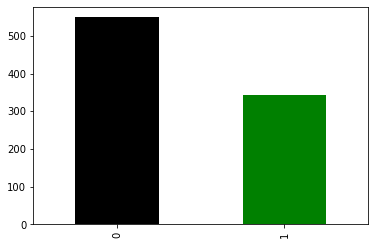

In [40]:
data['Survived'].value_counts().plot.bar(color=['black','green'])

In [84]:
values = data['Survived'].value_counts()
round(values[1]/values[0]*100, 0)

62.0

In [50]:
###Таким образом, мы выяснили, что большинство людей,к счастью, выжили###

In [125]:
###Гипотеза №1. Наилучшая выживаемость в подгруппе у людей, возрастом от 20 до 35 лет в силу своих физических преимуществ.###

In [126]:
((data['Age'] >=16) & (data['Age'] <= 40) & (data['Survived'] ==1)).value_counts()

False    705
True     186
dtype: int64

In [127]:
round(data[(data['Age'] >=16) & (data['Age'] <= 40) & (data['Survived'] ==1)].shape[0]/data[(data['Age'] >=16) & (data['Age'] <= 40) & (data['Survived'] == 0)].shape[0]*100, 0)

63.0

In [87]:
###Это процент выживаемости людей из первой категории###

In [123]:
(((data['Age'] <=16) | (data['Age'] >= 40)) & (data['Survived'] == 1)).value_counts()

False    775
True     116
dtype: int64

In [90]:
round(data[((data['Age'] <=16) | (data['Age'] >= 40)) & (data['Survived'] ==1)].shape[0]/data[((data['Age'] <=16) | (data['Age'] >= 40)) & (data['Survived'] ==0)].shape[0]*100, 0)

79.0

In [ ]:
###Это люди из второй категории###

In [129]:
round((data[(data['Age'] >=16) & (data['Age'] <= 40) & (data['Survived'] ==1)].shape[0]/data[(data['Age'] >=16) & (data['Age'] <= 40) & (data['Survived'] == 0)].shape[0])/(data[((data['Age'] <=16) | (data['Age'] >= 40)) & (data['Survived'] ==1)].shape[0]/data[((data['Age'] <=16) | (data['Age'] >= 40)) & (data['Survived'] ==0)].shape[0])*100, 0)

80.0

In [91]:
###Таким образом, люди, которые, казалось бы физически слабее тех, кто в первой категории имею меньший процент смертности.###
###Возможно, это связано с тем, что молодые люди чаще гибли, т.к. пытались помочь тем, кого превосходили в силе.###

In [108]:
###Гипотеза №2. Представительницы женского пола выживали чаще, т.к.они относились к тем группам, которые эвакуировали в первую очередь###

In [135]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [145]:
round(data[((data['Sex'] == 'female')  & (data['Survived'] == 1))].shape[0]/data[((data['Sex'] == 'female')  & (data['Survived'] == 0))].shape[0]*100, 0)

288.0

In [143]:
((data['Sex'] == 'female')  & (data['Survived'] ==1)).sum()

233

In [146]:
###Это соотношение выживших к умершим + количество выживших женщин###

In [150]:
round(data[((data['Sex'] == 'male')  & (data['Survived'] == 1))].shape[0] / data[((data['Sex'] == 'male')  & (data['Survived'] == 0))].shape[0]*100, 0)

23.0

In [148]:
((data['Sex'] == 'male')  & (data['Survived'] ==1)).sum()

109

In [ ]:
###Это соотношение выживших к умершим + количество выживших мужчин###

In [151]:
round((data[((data['Sex'] == 'male')  & (data['Survived'] == 1))].shape[0]/data[((data['Sex'] == 'male')  & (data['Survived'] == 0))].shape[0]) / (data[((data['Sex'] == 'female')  & (data['Survived'] == 1))].shape[0]/data[((data['Sex'] == 'female')  & (data['Survived'] == 0))].shape[0])*100, 0)

8.0

In [152]:
###Таким образом, можно сделать вывод, что не смотря на то, что мужчин было почти вдвое больше, по сравнению с женщинами, процент их выживаемости крайне мал.###
###Вывод: гипотеза имеет место быть###

In [155]:
###Гипотеза №3. Выживаемость людей, чья стоимость поездки превышала 30 (долларов?) превышает тех, кто был на судне за меньшую сумму, т.к. вероятнее люди, заплатившие больше были значимыми и их важно было спасти.### 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [156]:
((data['Fare'] > 20) & (data['Survived'] == 1)).value_counts() #Платившие больше и выжившие#

False    753
True     138
dtype: int64

In [162]:
((data['Fare'] > 20) & (data['Survived'] == 0)).value_counts() #Платившие больше и погибшие#

False    714
True     177
dtype: int64

In [163]:
round(data[((data['Fare'] > 20) & (data['Survived'] == 1))].shape[0] / data[((data['Fare'] > 20) & (data['Survived'] == 0))].shape[0]*100, 0)

112.0

In [164]:
###Соотношение между выжившими и погибшими людьми, которые заплатили большую сумму###

In [165]:
((data['Fare'] <= 20) & (data['Survived'] == 1)).value_counts() #Платившие меньше и выжившие#

False    748
True     143
dtype: int64

In [167]:
((data['Fare'] <= 20) & (data['Survived'] == 0)).value_counts() #Платившие меньше и погибшие#

False    519
True     372
dtype: int64

In [168]:
round(data[((data['Fare'] <= 20) & (data['Survived'] == 1))].shape[0] / data[((data['Fare'] <= 20) & (data['Survived'] == 0))].shape[0]*100, 0)

38.0

In [169]:
###Соотношение между выжившими и погибшими людьми, которые заплатили меньшую сумму###

In [173]:
round((data[((data['Fare'] <= 20) & (data['Survived'] == 1))].shape[0] / data[((data['Fare'] <= 20) & (data['Survived'] == 0))].shape[0]) / (data[((data['Fare'] > 20) & (data['Survived'] == 1))].shape[0] / data[((data['Fare'] > 20) & (data['Survived'] == 0))].shape[0])*100, 0)

34.0

In [174]:
###Соотношение выживаеимости среди тех, кто заплатил меньшую и большую суммы###

In [175]:
###Вывод: гипотеза имеет место быть###

In [ ]:
####Таким образом, подводя итог, используя нашу статистику, можно сказать, что есть зависимость между высоким процентом выживаемости и определёнными группами людей####
####И. как ни странно, статистика показала,что чаще выживали привелегированные группы, чем физически сильные####